In [9]:
import numpy as np
import re
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imdb import IMDb
from requests import get
import unidecode
from bs4 import BeautifulSoup
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

# Reading in the data

In [10]:
df = pd.read_csv('movie_metadata.csv')

In [11]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [12]:
df.shape

(5043, 28)

In [13]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4927.000000,4959.000000,4872.000000,4953.000000,4968.000000,4.104000e+03,4.974000e+03,4974.000000,4961.000000,4956.000000,4.494000e+03,4869.000000,4963.000000,4974.000000,4654.000000,4974.000000
mean,140.572965,107.193991,691.233990,647.790430,6573.525765,4.862765e+07,8.382561e+04,9729.287495,1.372707,273.584746,3.998652e+07,2002.487985,1660.086641,6.439767,2.223350,7572.120828
std,121.858265,24.977939,2822.022077,1672.724849,15077.147622,6.853339e+07,1.386775e+05,18228.145064,2.017257,378.750005,2.073754e+08,12.433410,4055.957071,1.124002,1.393249,19422.681479
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Filling NAN's with median.

In [14]:
def fill_nan(col):
    df[col] = df[col].fillna(df[col].median())

cols = list(df.columns)
fill_nan(cols)

# Cleaning

In [15]:
def clean_backward_title(col):
    string = col.rstrip()[:-2]
#     print unidecode.unidecode(string)
    return string

In [8]:
# clean_backward_title("32 rue d'Athènes Paris France")

/home/yash/anaconda2/lib/python2.7/site-packages/unidecode/__init__.py:46: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  _warn_if_not_unicode(string)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 12: ordinal not in range(128)

In [16]:
df['movie_title'] = df['movie_title'].astype(str)

In [17]:
df['movie_title'] = df['movie_title'].apply(clean_backward_title)

# IMDB Revenue scraping script. Redundant right now.. but can be useful in other projects

In [474]:
# def revenue_parse(url, revenue_per_movie):
#     url = url + 'business'
#     response = get(url)
#     html_soup = BeautifulSoup(response.text, 'html.parser')
#     movie_containers = html_soup.find('div', {"id": "tn15content"})
#     text_spend = movie_containers.text.split('\n')
#     if 'Gross' in text_spend:
#         gross_index = text_spend.index('Gross')
#         rev = [int(i[1:].replace(',', '')) if i[1:].replace(',', '').isdigit() else -1 for i in re.findall(r'[$]\S*', text_spend[gross_index+1])]
#         if len(rev) == 0:
#             revenue_per_movie.append(-1)
#         else:
#             revenue_per_movie.append(max(rev))
#     else:
#         revenue_per_movie.append(-1)


# revenue_per_movie = []

# for i in df['url']:
#     revenue_parse(i, revenue_per_movie)

# Describing the data to find the Missing values

In [18]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.00000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.869720,107.124132,669.456871,642.868531,6490.47214,4.433833e+07,8.315077e+04,9638.549177,1.366647,271.573468,3.781071e+07,2002.574658,1643.190561,6.441959,2.233119,7470.780984
std,120.535511,24.774814,2776.189759,1658.130651,14979.85268,6.247029e+07,1.378445e+05,18119.377709,2.001342,375.774914,1.958590e+08,12.225589,4025.851655,1.116440,1.338851,19308.507567
min,1.000000,7.000000,0.000000,0.000000,0.00000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,51.000000,93.000000,8.000000,139.500000,625.00000,9.116578e+06,8.972500e+03,1442.000000,0.000000,67.000000,7.500000e+06,1999.000000,290.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,372.000000,989.00000,2.559138e+07,3.450400e+04,3097.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,165.500000
75%,192.000000,117.000000,188.000000,633.000000,11000.00000,5.089081e+07,9.444550e+04,13629.500000,2.000000,322.000000,4.000000e+07,2010.000000,912.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.00000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Normalizing or Standardizing the data.. change the commenting as per your needs

In [19]:
col = list(df.describe().columns)

In [20]:
sc = StandardScaler()
# sc = MinMaxScaler()
temp = sc.fit_transform(df[col])
df[col] = temp
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,4.838309,2.861087,-0.241166,0.127947,Joel David Moore,-0.366560,11.465267,Action|Adventure|Fantasy|Sci-Fi,...,7.405237,English,USA,PG-13,1.017104,0.525617,-0.175680,1.306103,-0.338472,1.322306
1,Color,Gore Verbinski,1.345216,2.497779,-0.038350,0.215403,Orlando Bloom,2.237195,4.243491,Action|Adventure|Fantasy,...,2.572078,English,USA,PG-13,1.338796,0.362010,0.833896,0.589468,0.087308,-0.386955
2,Color,Sam Mendes,3.834356,1.650060,-0.241166,-0.290638,Rory Kinnear,0.301069,2.493206,Action|Adventure|Thriller,...,1.922689,English,UK,PG-13,1.057954,1.016440,-0.310571,0.320731,0.087308,4.015686
3,Color,Christopher Nolan,5.585051,2.295941,7.684150,13.484672,Christian Bale,1.369277,6.464391,Action|Thriller,...,6.465752,English,USA,PG-13,1.083485,0.771028,5.305443,1.843579,0.087308,8.107553
4,NaN,Doug Walker,-0.247833,-0.166481,-0.193975,-0.163374,Rob Walker,-0.424577,-0.300124,Documentary,...,-0.304929,NaN,NaN,NaN,-0.090945,0.198402,-0.405219,0.589468,0.087308,-0.386955


# PCA

In [21]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[col])

In [22]:
df_pca

array([[ 11.5049753 ,  -7.00113882,  -1.48594034],
       [  5.87327852,  -0.25996409,   0.96281839],
       [  5.12052324,  -2.5685266 ,  -2.51319403],
       ..., 
       [ -1.83001332,   0.1492587 ,  -0.77904503],
       [ -1.56034839,   0.69208507,  -0.59178108],
       [ -1.64526746,  -0.15951378,   0.02603791]])

In [23]:
pca.explained_variance_ratio_

array([ 0.27875487,  0.13013809,  0.08609088])

In [25]:
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]
df['pca_three'] = df_pca[:, 2]

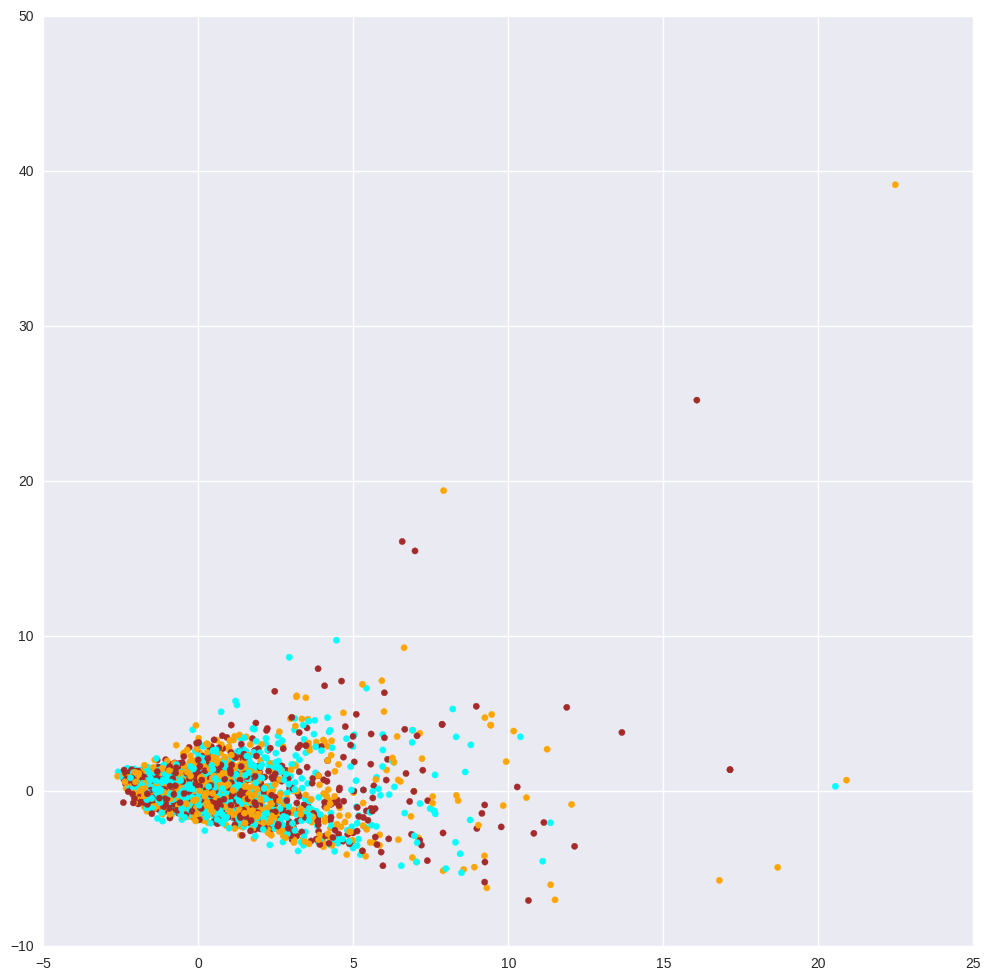

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(df['pca_one'], df['pca_two'], 
            color=['orange', 'cyan', 'brown'], cmap='viridis')
# for m, p1, p2 in zip(df['movie_title'], df_standard['pca_one'], df_standard['pca_two']):
#     print m
#     plt.text(p1, p2, s=m, 
#              color=np.random.rand(3)*0.7)